In [2]:
import os
import pdb
import sys
import numpy as np
import pandas as pd
import glob
from utilsBeehiveState import report_SVM_beehiveState_results, SVM_Classification_BeehiveSTATE

sys.path.append('/Users/annayang/Documents/QueenBee/Bee_NotBee_classification')

from utils import load_audioFiles_saves_segments, write_Statelabels_from_samplesFolder, get_samples_id_perSet, get_features_from_samples, get_GT_labels_fromFiles, labels2binary, get_list_samples_names, split_samples_ramdom
from info import i, printb, printr, printp

In [3]:
old_path_audioFiles = "/Users/annayang/Documents/QueenBee/Data"+os.sep 
old_path_save_audio_labels='/Users/annayang/Documents/QueenBee/Dataset'+os.sep  # path where to save audio segments and labels files.
old_path_raw_state_labels = '/Users/annayang/Documents/QueenBee/Dataset/old_state_labels.csv'

path_audioFiles = "/Users/annayang/Documents/QueenBee/MyData"+os.sep 
path_save_audio_labels='/Users/annayang/Documents/QueenBee/MyDataset'+os.sep  # path where to save audio segments and labels files.
path_raw_state_labels = '/Users/annayang/Documents/QueenBee/MyDataset/state_labels.csv'

In [4]:
old_sample_ids_test, old_sample_ids_train, old_sample_ids_val = get_samples_id_perSet(old_path_save_audio_labels+'split_random_0.json')
old_X_test = get_features_from_samples(old_path_save_audio_labels, old_sample_ids_test, 'MFCCs20', 'NO', 0)

sample_ids_test, sample_ids_train, sample_ids_val = get_samples_id_perSet(path_save_audio_labels+'split_random_0.json')
X_test = get_features_from_samples(path_save_audio_labels, sample_ids_test, 'MFCCs20', 'NO', 0)

In [5]:
labels2read = 'state_labels'
labels_test = get_GT_labels_fromFiles(old_path_save_audio_labels, old_sample_ids_test, labels2read)
old_Y_test = labels2binary('missing queen', labels_test)

In [6]:
labels_test = get_GT_labels_fromFiles(path_save_audio_labels, sample_ids_test, labels2read)
Y_test= labels2binary('missing queen', labels_test)

In [7]:
type(old_X_test[0])

numpy.ndarray

1 1 1 THEIR DATA


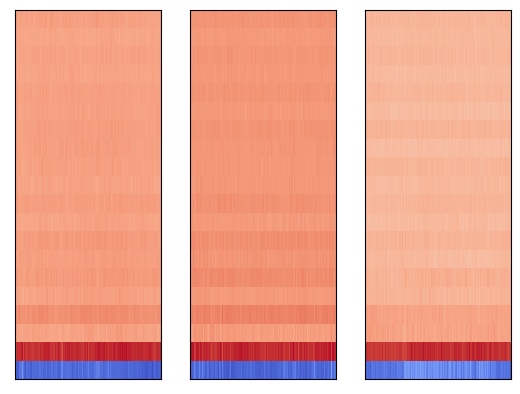

In [8]:
import tensorflow as tf
import tensorflow_io as tfio
import librosa
from matplotlib import pyplot as plt
print(old_Y_test[0], old_Y_test[1], old_Y_test[2], 'THEIR DATA')
fig, ax =  plt.subplots(nrows=1, ncols=3, sharex=True)

librosa.display.specshow(old_X_test[0], ax=ax[0])
librosa.display.specshow(old_X_test[1], ax=ax[1])
librosa.display.specshow(old_X_test[2], ax=ax[2])

1 1 1 MY DATA


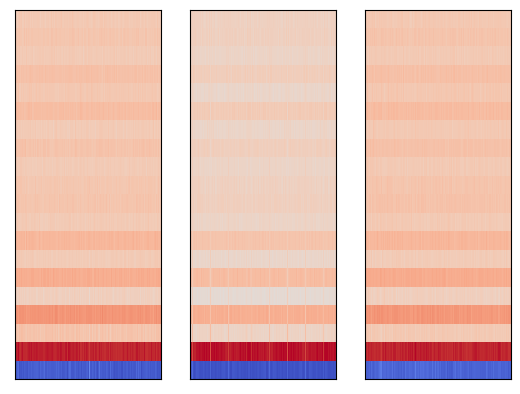

In [9]:
print(Y_test[0], Y_test[11], Y_test[16], 'MY DATA')
fig, ax =  plt.subplots(nrows=1, ncols=3, sharex=True)

librosa.display.specshow(X_test[0], ax=ax[0])
librosa.display.specshow(X_test[11], ax=ax[1])
librosa.display.specshow(X_test[16], ax=ax[2])

0 0 0 THEIR DATA


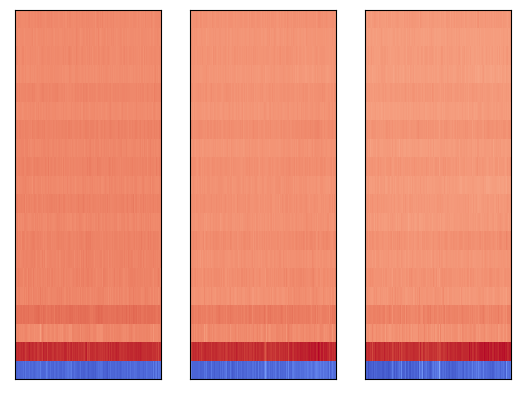

In [10]:
print(old_Y_test[560], old_Y_test[561], old_Y_test[564], 'THEIR DATA')
fig, ax =  plt.subplots(nrows=1, ncols=3, sharex=True)

librosa.display.specshow(old_X_test[560], ax=ax[0])
librosa.display.specshow(old_X_test[561], ax=ax[1])
librosa.display.specshow(old_X_test[564], ax=ax[2])

0 0 0 MY DATA


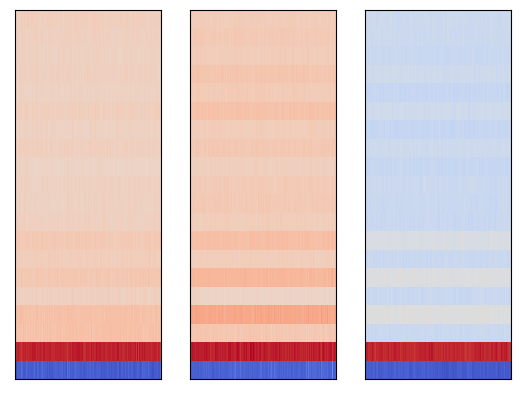

In [11]:
print(Y_test[50], Y_test[2], Y_test[5], 'MY DATA')
fig, ax =  plt.subplots(nrows=1, ncols=3, sharex=True)

librosa.display.specshow(X_test[50], ax=ax[0])
librosa.display.specshow(X_test[2], ax=ax[1])
librosa.display.specshow(X_test[5], ax=ax[2])

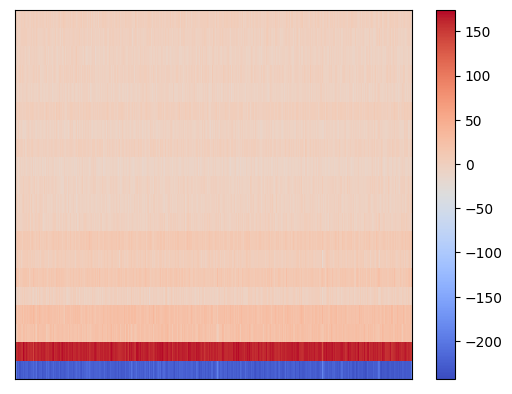

In [12]:
plt.figure()
librosa.display.specshow(X_test[50])
plt.colorbar()

## wav file visualization

In [26]:
from scipy.io.wavfile import read

1 1 1 THEIR DATA


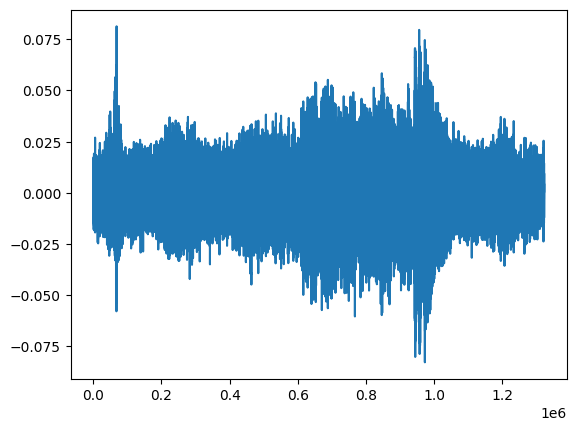

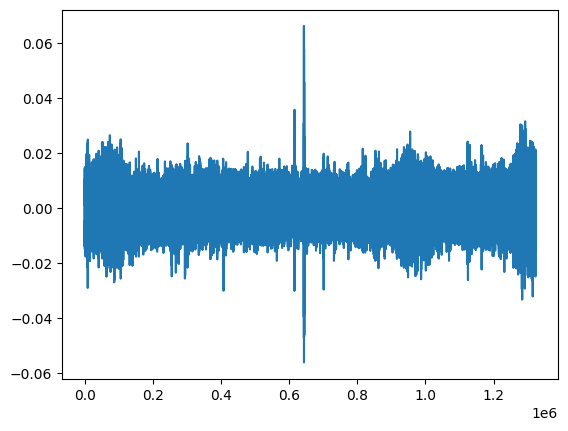

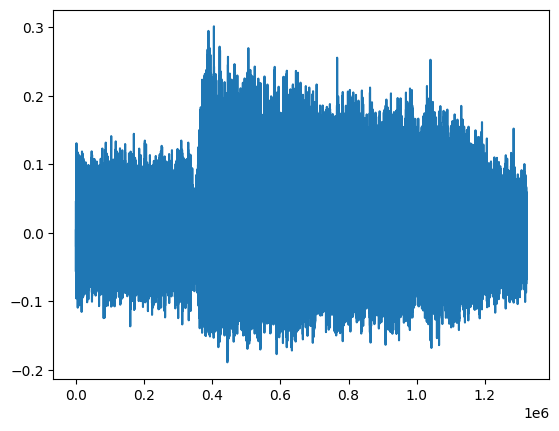

In [33]:
print(old_Y_test[0], old_Y_test[1], old_Y_test[2], 'THEIR DATA')
plt.plot(read(old_path_save_audio_labels + old_sample_ids_test[0])[1])
plt.show()
plt.plot(read(old_path_save_audio_labels + old_sample_ids_test[1])[1])
plt.show()
plt.plot(read(old_path_save_audio_labels + old_sample_ids_test[2])[1])
plt.show()

1 1 1 MY DATA


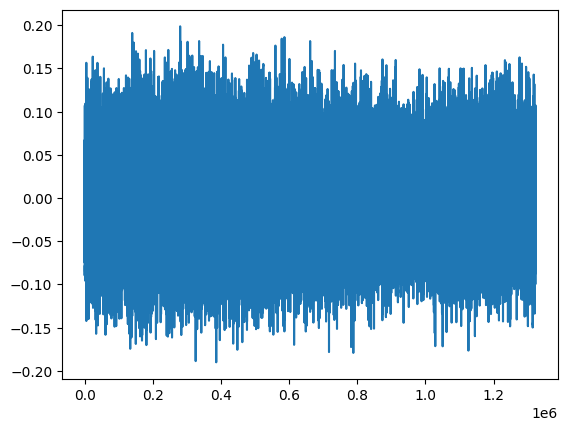

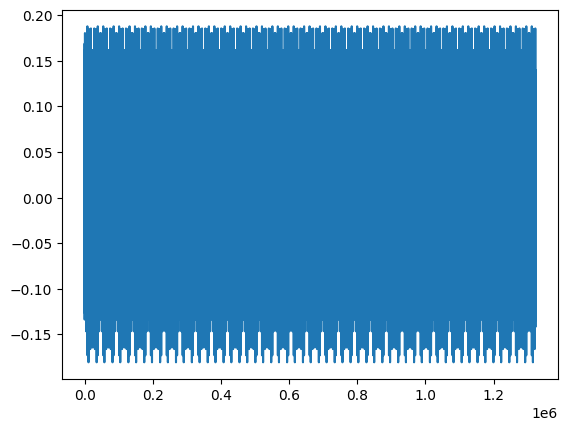

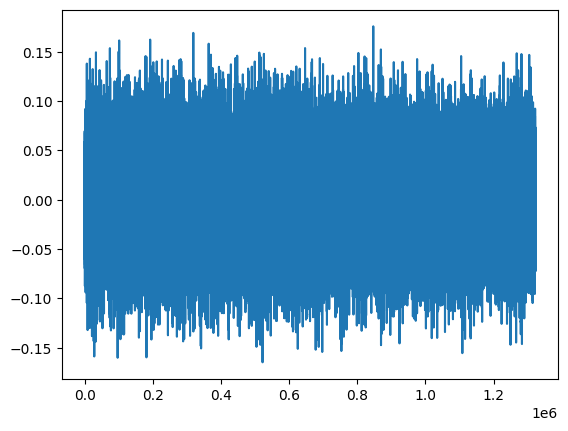

In [34]:
print(Y_test[0], Y_test[11], Y_test[16], 'MY DATA')
plt.plot(read(path_save_audio_labels + sample_ids_test[0])[1])
plt.show()
plt.plot(read(path_save_audio_labels + sample_ids_test[11])[1])
plt.show()
plt.plot(read(path_save_audio_labels + sample_ids_test[16])[1])
plt.show()

0 0 0 THEIR DATA


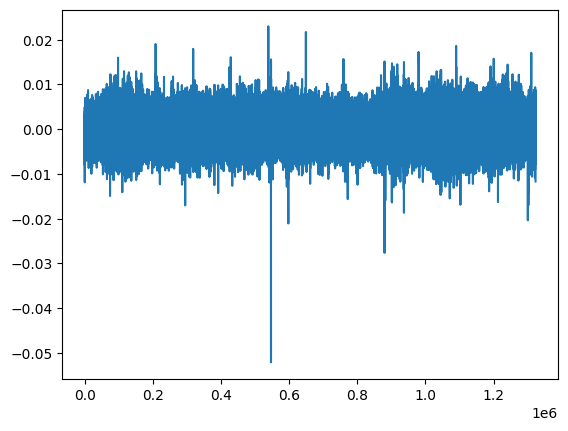

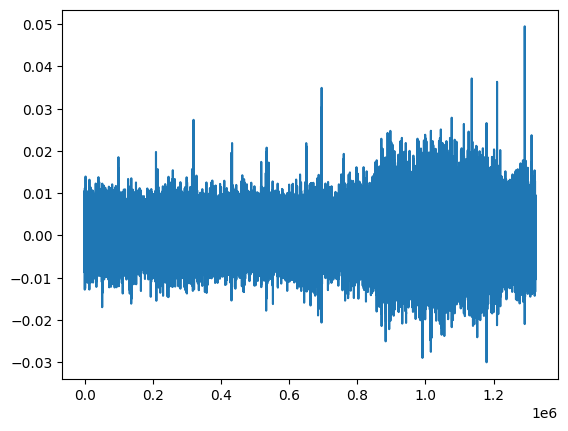

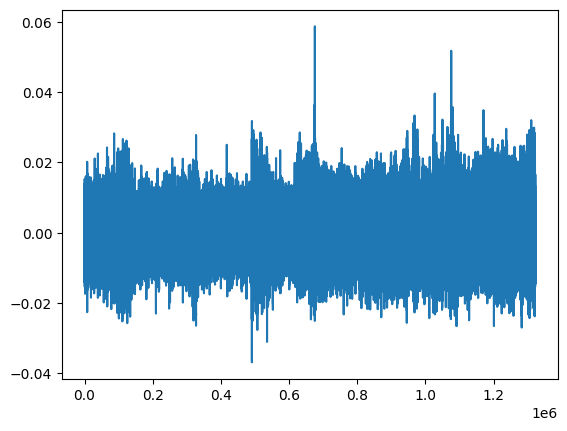

In [35]:
print(old_Y_test[560], old_Y_test[561], old_Y_test[564], 'THEIR DATA')
plt.plot(read(old_path_save_audio_labels + old_sample_ids_test[560])[1])
plt.show()
plt.plot(read(old_path_save_audio_labels + old_sample_ids_test[561])[1])
plt.show()
plt.plot(read(old_path_save_audio_labels + old_sample_ids_test[564])[1])
plt.show()

0 0 0 MY DATA


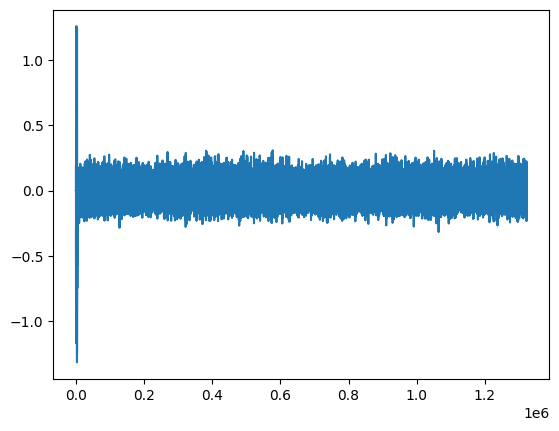

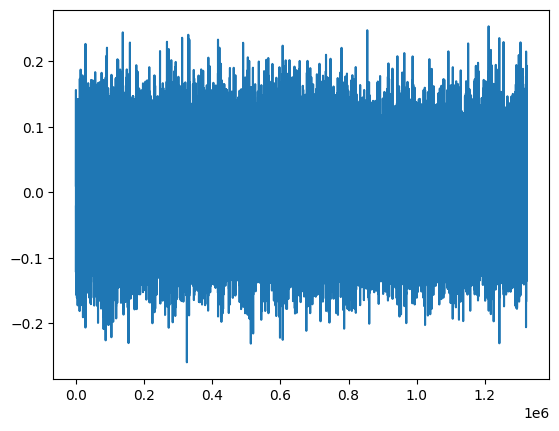

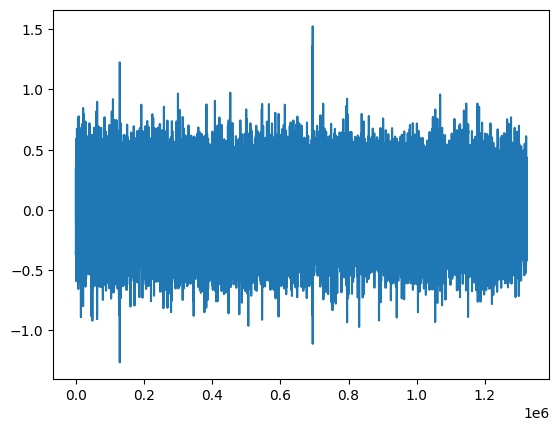

In [36]:
print(Y_test[50], Y_test[2], Y_test[5], 'MY DATA')
plt.plot(read(path_save_audio_labels + sample_ids_test[50])[1])
plt.show()
plt.plot(read(path_save_audio_labels + sample_ids_test[2])[1])
plt.show()
plt.plot(read(path_save_audio_labels + sample_ids_test[5])[1])
plt.show()